In [3]:
# import os
# cwd = os.getcwd()
# print(cwd)

# import zipfile
# with zipfile.ZipFile("//home/workspace/covid-19/covid_database.zip","r") as zip_ref:
#     zip_ref.extractall("/home/workspace/covid-19")
    

/home/workspace/covid-19


In [7]:
import os
import numpy as np
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim


import matplotlib.pyplot as plt                        
%matplotlib inline      


In [8]:

data_dir = '/home/workspace/covid-19/database'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')
valid_dir = os.path.join(data_dir, 'valid/')

data_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))
print('Num validation images: ', len(valid_data))

Num training images:  1012
Num test images:  624
Num validation images:  16


In [9]:


# define dataloader parameters
batch_size = 20
num_workers=0
# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)

loaders_combined= {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

classes = ['NORMAL', 'PNEUMONIA']

torch.Size([3, 224, 224])


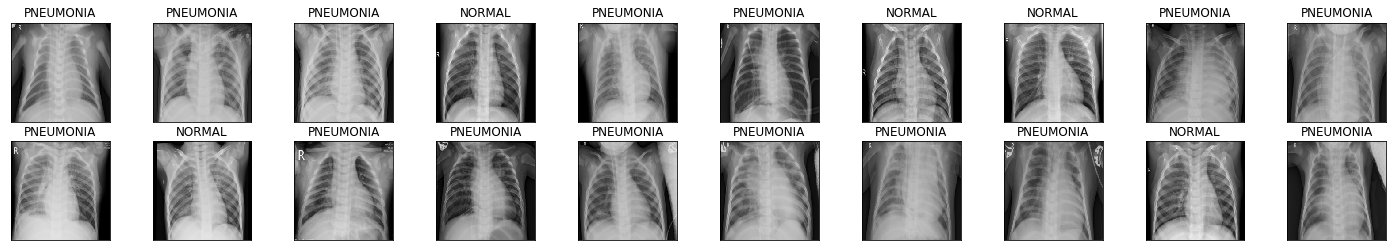

In [10]:
# Visualize some sample data
# obtain one batch of training images
# dataiter = iter(train_loader)
# images, labels = dataiter.next()
# images = images.numpy() # convert images to numpy for display
import torchvision

data_iter = iter(test_loader)
images, labels = next(data_iter)
#images=images.numpy()
# plt.imshow(images[0])

# print(type(images))

# print(images[0].shape)

#plt.imshow(transforms.ToPILImage()(images[5]), interpolation="bicubic")

# a=images[2].permute(1, 2, 0)
# plt.imshow(a.numpy())

# to_pil = torchvision.transforms.ToPILImage()
# img = to_pil(images[0])
# plt.imshow(img)


# for img in images:
#     temp =img.permute(1, 2, 0)
#     plt.imshow(temp)

print(images[0].shape)

images = images.numpy() # convert images to numpy for display
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])


In [57]:
# num_classes = 2 # total classes of dog breeds

# # check if CUDA is available
# use_cuda = torch.cuda.is_available()

# # define the CNN architecture
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         # convolutional layer (sees 32x32x3 image tensor)
#         self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
#         # convolutional layer (sees 16x16x16 tensor)
#         self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
#         # convolutional layer (sees 8x8x32 tensor)
#         self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
#         # max pooling layer
#         self.pool = nn.MaxPool2d(2, 2)
#         # linear layer (64 * 4 * 4 -> 500)
#         self.fc1 = nn.Linear(64 * 4 * 4, 500)
#         # linear layer (500 -> 10)
#         self.fc2 = nn.Linear(500, 10)
#         # dropout layer (p=0.25)
#         self.dropout = nn.Dropout(0.25)
#         self.fc3 = nn.Linear(10, 2)
        
#     def forward(self, x):
#         # add sequence of convolutional and max pooling layers
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.pool(F.relu(self.conv3(x)))
#         # flatten image input
#         x = x.view(-1, 64 * 4 * 4)
#         # add dropout layer
#         x = self.dropout(x)
#         # add 1st hidden layer, with relu activation function
#         x = F.relu(self.fc1(x))
#         # add dropout layer
#         x = self.dropout(x)
#         # add 2nd hidden layer, with relu activation function
#         x = self.fc2(x)
#         x = self.dropout(x)
#         x = self.fc3(x)
#         return x


# # instantiate the CNN
# model = Net()
# print(model)

# # move tensors to GPU if CUDA is available
# if use_cuda:
#     model.cuda()

In [28]:

# check if CUDA is available
use_cuda = torch.cuda.is_available()
num_classes = 2

import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        # pool
        self.pool = nn.MaxPool2d(2, 2)
        
        # fully-connected
        self.fc1 = nn.Linear(7*7*128, 500)
        self.fc2 = nn.Linear(500, num_classes) 
        
        # drop-out
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        # flatten
        x = x.view(-1, 7*7*128)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = self.fc2(x)
        return x



# instantiate the CNN
model= Net()
print(model)

# move tensors to GPU if CUDA is available
if use_cuda:
    model.cuda()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=2, bias=True)
  (dropout): Dropout(p=0.3)
)


In [26]:

# # check if CUDA is available
# use_cuda = torch.cuda.is_available()
# num_classes = 2

# import torch.nn as nn
# import torch.nn.functional as F
# import numpy as np

# # define the CNN architecture
# class Net(nn.Module):
#     ### TODO: choose an architecture, and complete the class
#     def __init__(self):
#         super(Net, self).__init__()
#         ## Define layers of a CNN
#         self.conv1 = nn.Conv2d(3, 64, 3, stride=2, padding=1)
#         self.conv2 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
#         self.conv3 = nn.Conv2d(128, 256, 3, padding=1)

#         # pool
#         self.pool = nn.MaxPool2d(2, 2)

#         # fully-connected
#         self.fc1 = nn.Linear(7*7*128, 500)
#         self.fc2 = nn.Linear(500, 128)
#         self.fc3 = nn.Linear(128, 32)
#         self.fc4 = nn.Linear(32, num_classes)

#         # drop-out
#         self.dropout = nn.Dropout(0.3)

#     def forward(self, x):
#         ## Define forward behavior
#         x = F.relu(self.conv1(x))
#         x = self.pool(x)
#         x = F.relu(self.conv2(x))
#         x = self.pool(x)
#         x = F.relu(self.conv3(x))
#         x = self.pool(x)

#         # flatten
#         x = x.view(-1, 7*7*128)

#         x = self.dropout(x)
#         x = F.relu(self.fc1(x))

#         x = self.dropout(x)
#         x = F.relu(self.fc2(x))
#         x = self.dropout(x)
#         x = F.relu(self.fc3(x))
#         x = self.dropout(x)
#         x = self.fc4(x)


#         return x



# # instantiate the CNN
# model= Net()
# print(model)



In [29]:


### TODO: select loss function
criterion = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.03)


In [30]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            #train_loss += loss.item()*data.size(0)
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 20 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    
            
    # return trained model
    return model

# load the model that got the best validation accuracy
model.load_state_dict(torch.load('model_scratch.pt'))

# train the model
model = train(2, loaders_combined, model, optimizer, 
                      criterion, use_cuda, 'model_scratch.pt')



Epoch 1, Batch 1 loss: 0.226267
Epoch 1, Batch 21 loss: 0.114681
Epoch 1, Batch 41 loss: 0.104707
Epoch: 1 	Training Loss: 0.103290 	Validation Loss: 0.608803
Validation loss decreased (inf --> 0.608803).  Saving model ...
Epoch 2, Batch 1 loss: 0.145100
Epoch 2, Batch 21 loss: 0.075919
Epoch 2, Batch 41 loss: 0.085071
Epoch: 2 	Training Loss: 0.089617 	Validation Loss: 0.593197
Validation loss decreased (0.608803 --> 0.593197).  Saving model ...


In [24]:
# import torchvision.models as models
# import torch.nn as nn

# # from torchsummary import summary
# # summary(your_model, input_size=(channels, H, W))

# ## TODO: Specify model architecture 

# model = models.resnet50(pretrained=True)


# if use_cuda:
#     model = model.cuda()
    
# #print(model_transfer)
# print(model.fc)
# model.fc=nn.Linear(2048,2)
# print(model.fc)

# print(model)

# for param in model.parameters():
#     param.requires_grad = False
    
# fc_parameters = model.fc.parameters()


# for param in fc_parameters:
#     param.requires_grad = True

    

# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.fc.parameters(), lr=0.001)

# if use_cuda:
#     model = model.cuda()
    
# print(use_cuda)


Linear(in_features=2048, out_features=1000, bias=True)
Linear(in_features=2048, out_features=2, bias=True)
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inpl

In [31]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_combined, model, criterion, use_cuda)

Test Loss: 0.610697


Test Accuracy: 76% (478/624)


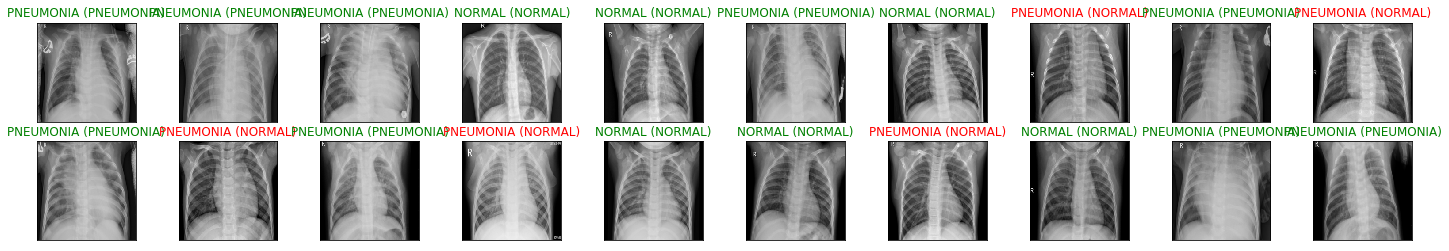

In [32]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()
# move model inputs to cuda, if GPU available
if use_cuda:
    images = images.cuda()
# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tenspreds_tensor.numpy())
# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
    color=("green" if preds[idx]==labels[idx].item() else "red"))